In [1]:
import os, inspect, sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

CURRENT_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.insert(0, ROOT_DIR)


In [2]:
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "Data_File_Monthly.csv")

In [3]:
df = pd.read_csv(ffname, parse_dates=["DATE"])
df.DATE = pd.to_datetime(df.DATE, format="%Y-%m")
df.head()


,DATE,PAYEMS,CEU0500000003,USPRIV,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023622,LNS13023706,...,MNFCTRMPCIMSA,MNFCTRMPCSMSA,MARTSMPCSM44000USS,MORTGAGE30US,MORTGAGE15US,DGS1,DGS2,DGS5,DGS10,Crude_Oil_Price
0,1987-01-01,100683,NaN,83638,34.7,3060,17045,7892,49.7,11.0,...,NaN,NaN,NaN,9.2,NaN,NaN,NaN,NaN,7.1,NaN
1,1987-02-01,100915,NaN,83879,34.9,3064,17036,7865,48.5,13.1,...,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,7.3,NaN
2,1987-03-01,101164,NaN,84100,34.7,3072,17064,7862,48.2,12.6,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,7.2,NaN
3,1987-04-01,101502,NaN,84393,34.7,3073,17109,7542,49.0,12.6,...,NaN,NaN,NaN,9.8,NaN,NaN,NaN,NaN,8.0,NaN
4,1987-05-01,101728,NaN,84616,34.8,3078,17112,7574,47.6,12.5,...,NaN,NaN,NaN,10.6,NaN,NaN,NaN,NaN,8.6,NaN


Make a clen copy of data. This allows us to modify freely while we have always the original data for any further reference.

In [4]:
df_original = df.copy() 

Reindex data frame per the time stamps

In [5]:
df.set_index("DATE", inplace=True)
df.head()

,PAYEMS,CEU0500000003,USPRIV,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023622,LNS13023706,LNS13023654,...,MNFCTRMPCIMSA,MNFCTRMPCSMSA,MARTSMPCSM44000USS,MORTGAGE30US,MORTGAGE15US,DGS1,DGS2,DGS5,DGS10,Crude_Oil_Price
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,100683,NaN,83638,34.7,3060,17045,7892,49.7,11.0,13.5,...,NaN,NaN,NaN,9.2,NaN,NaN,NaN,NaN,7.1,NaN
1987-02-01,100915,NaN,83879,34.9,3064,17036,7865,48.5,13.1,12.6,...,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,7.3,NaN
1987-03-01,101164,NaN,84100,34.7,3072,17064,7862,48.2,12.6,12.5,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,7.2,NaN
1987-04-01,101502,NaN,84393,34.7,3073,17109,7542,49.0,12.6,12.8,...,NaN,NaN,NaN,9.8,NaN,NaN,NaN,NaN,8.0,NaN
1987-05-01,101728,NaN,84616,34.8,3078,17112,7574,47.6,12.5,12.4,...,NaN,NaN,NaN,10.6,NaN,NaN,NaN,NaN,8.6,NaN


Check on the missing values

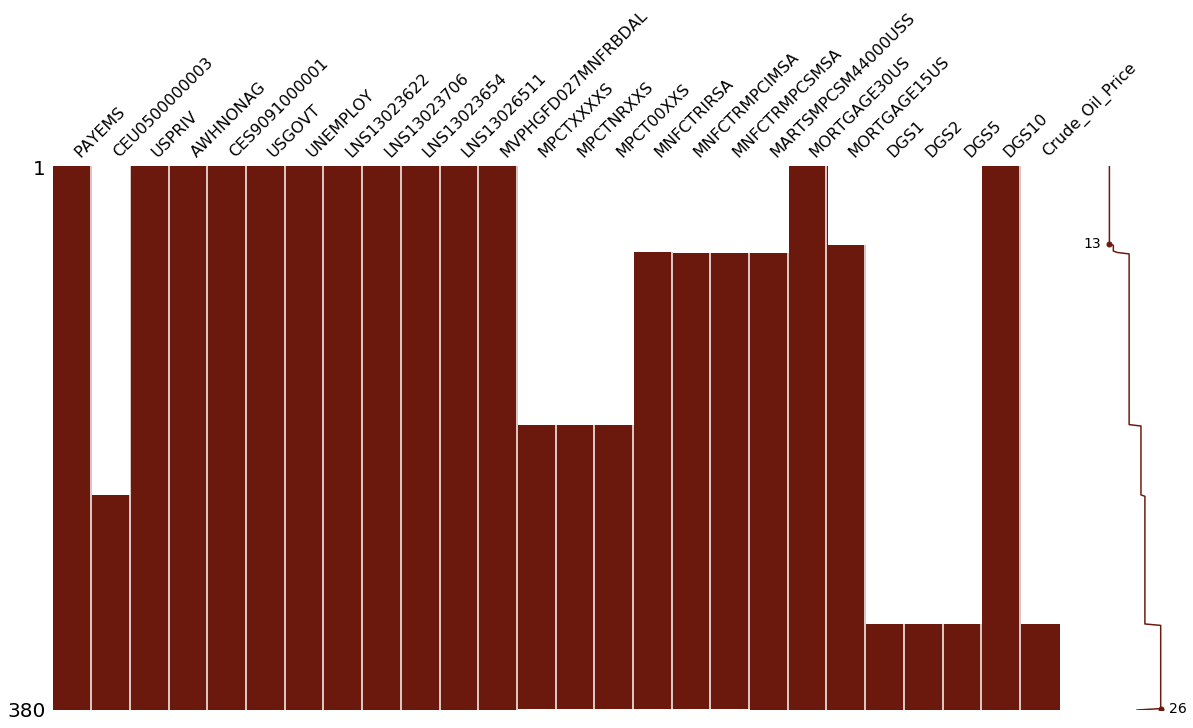

In [6]:
msno.matrix(df=df, figsize=(20, 10), color=(0.42, 0.1, 0.05))

Drop any columns with NaN values

In [7]:
# drop columns: axis=1; drop rows: axis=0
df.dropna(axis=1, inplace=True)

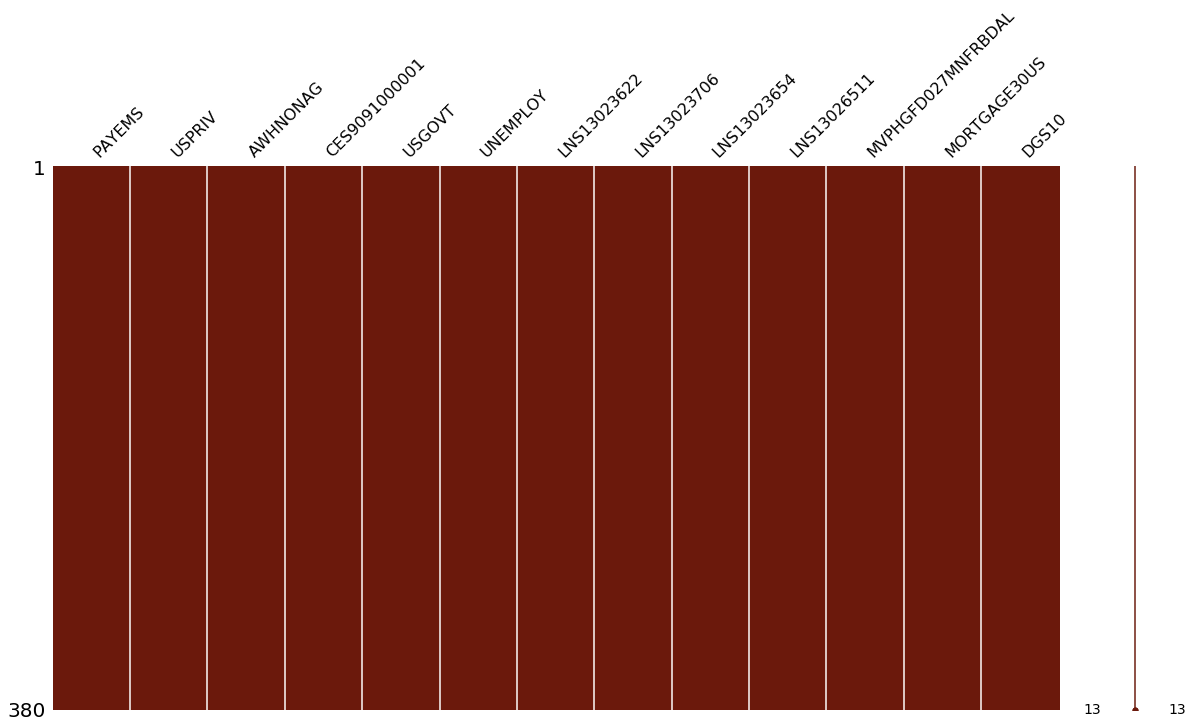

In [8]:
msno.matrix(df=df, figsize=(20, 10), color=(0.42, 0.1, 0.05))

Check on distribution of variables

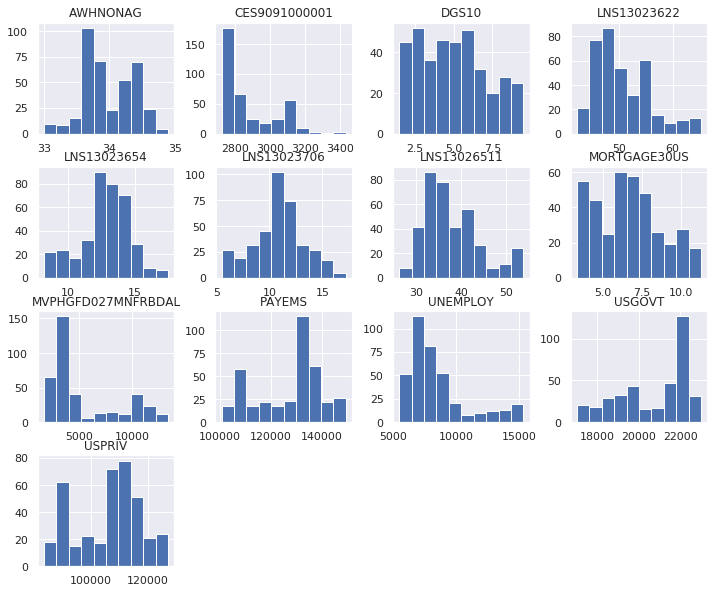

In [9]:
sns.set()
_ = df.hist(sharex=False,
            sharey=False,
            figsize=(12, 10))
plt.show()

Check on variable correlations

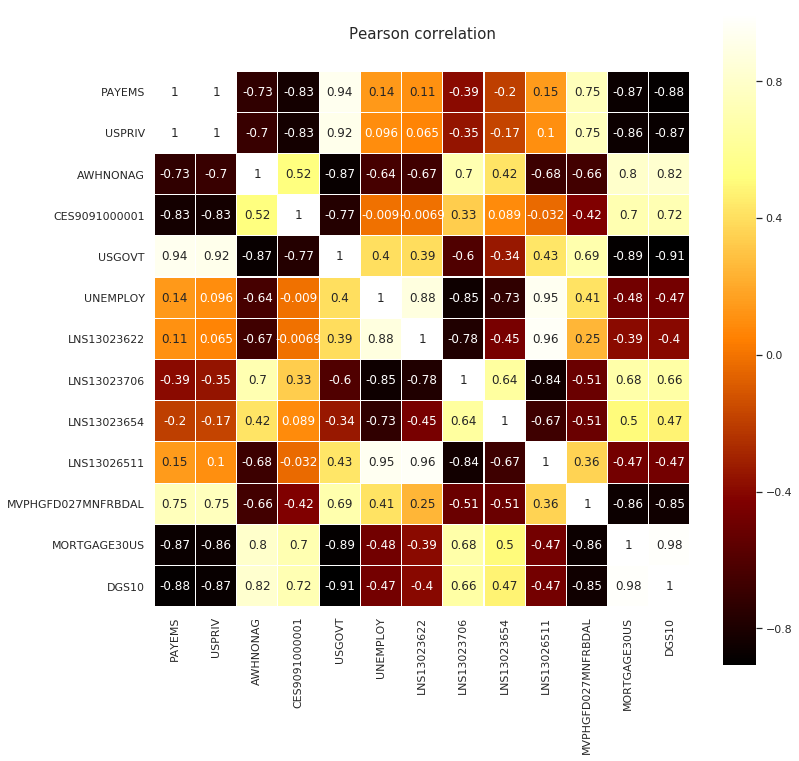

In [10]:
colormap = plt.cm.afmhot
plt.figure(figsize=(12,12))
plt.title('Pearson correlation', y=1.05, size=15)
sns.heatmap(df.corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True, 
            cmap=colormap,
            linecolor='white',
            annot=True)
plt.show()

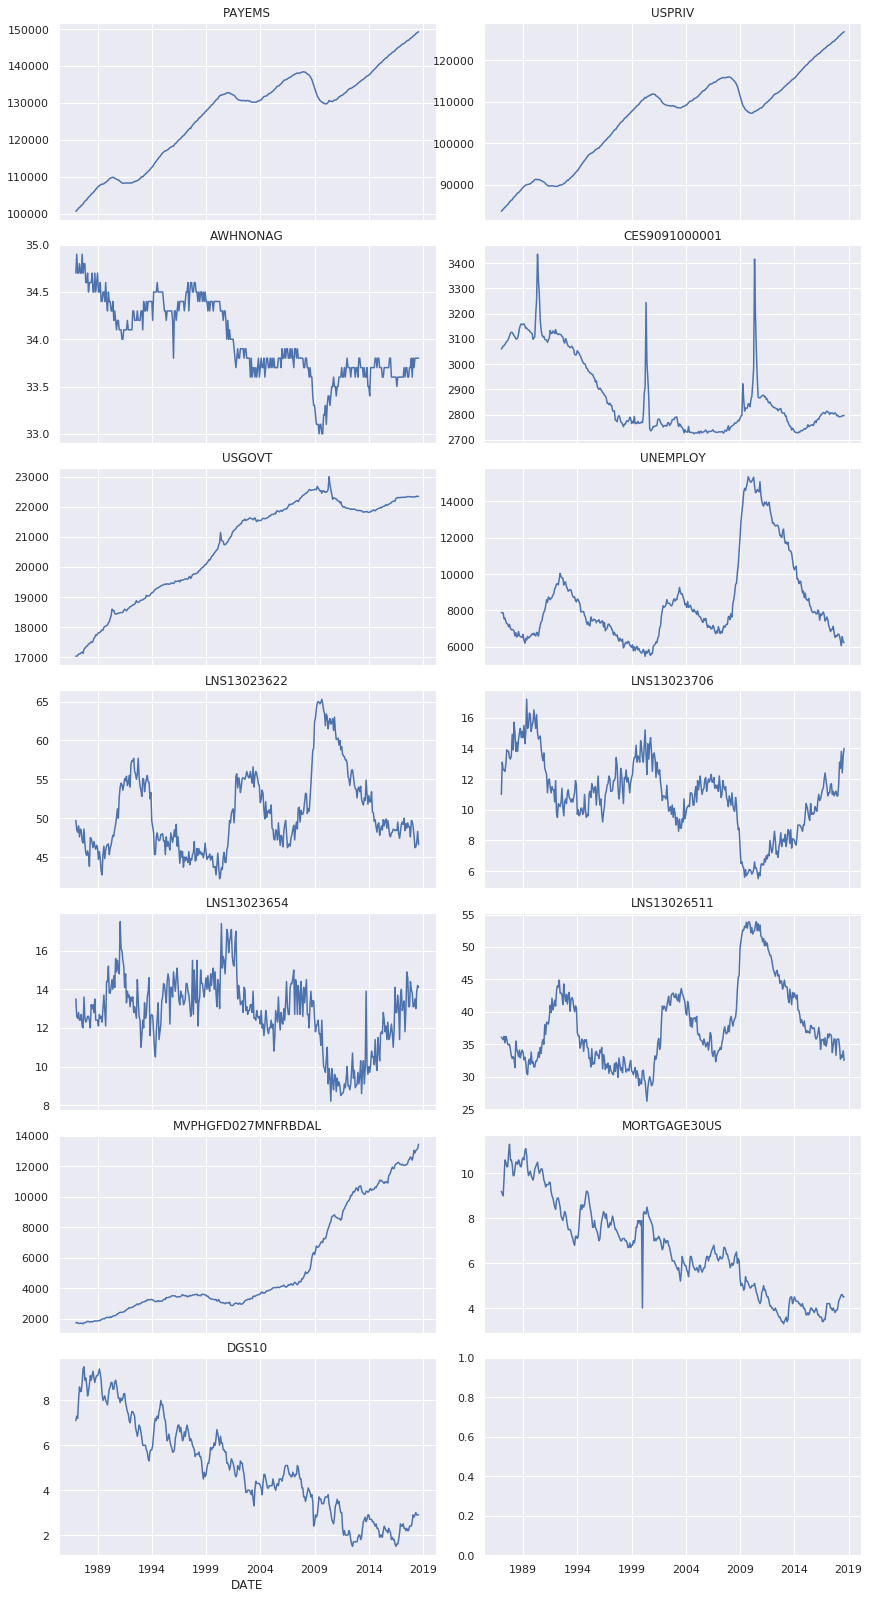

In [11]:
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    df[label].plot(title=label, ax=axs[i, j])

Check on autocorrelation plots to get an estimate of lag in the time series

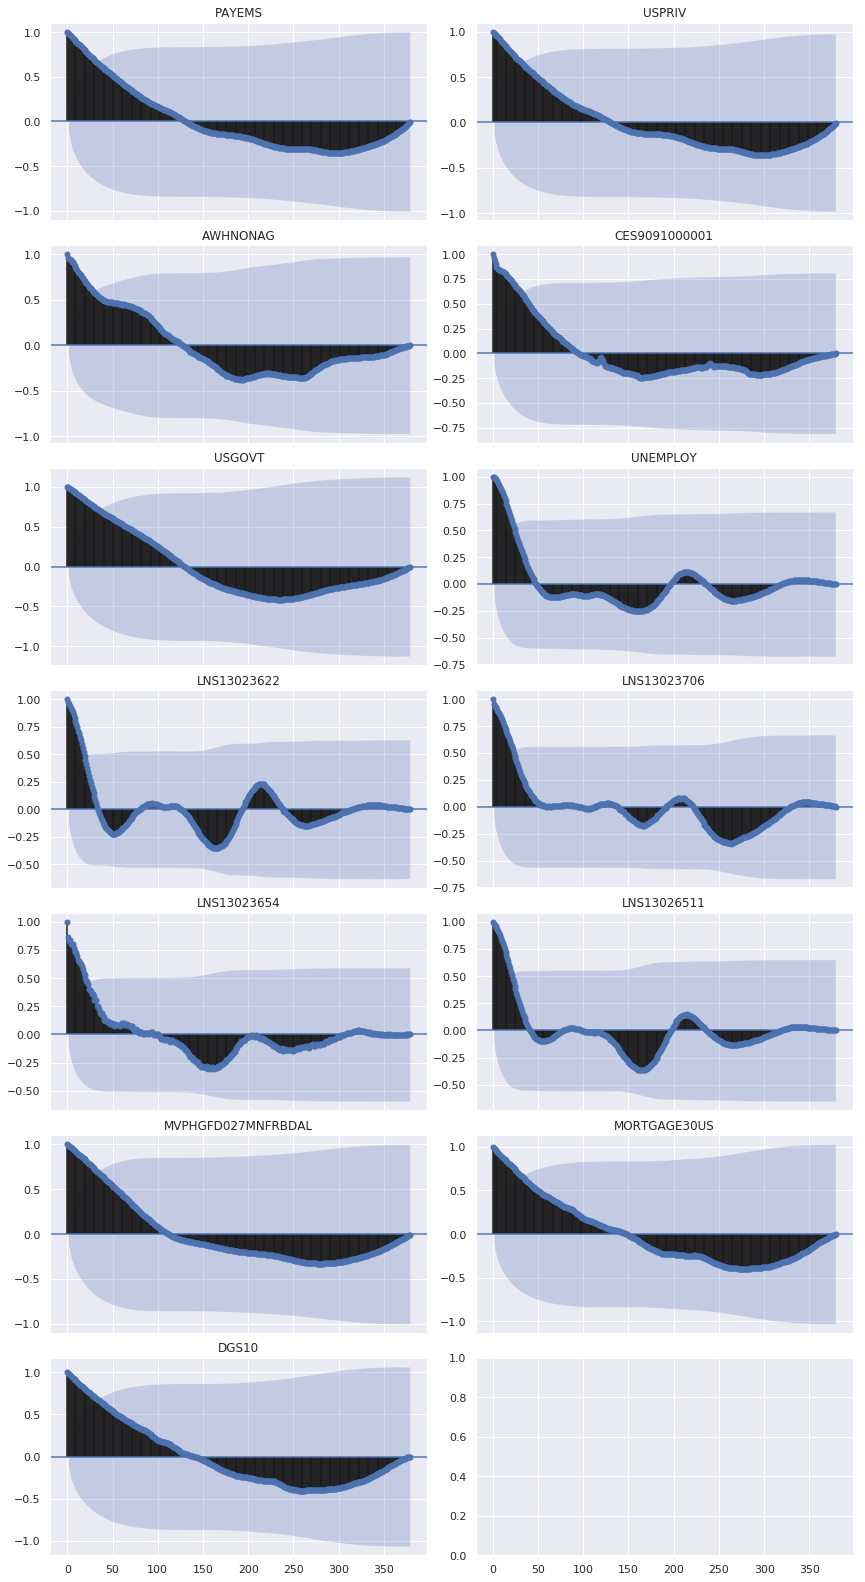

In [12]:
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    plot_acf(df[label], title=label, ax=axs[i, j])

Detrend time series (make time series stationary)

In [13]:
#
#
#
#
#
#

Save prcessed data

In [14]:
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "data_monthly_processed.csv")
df.to_csv(ffname)